In [460]:
import pandas as pd
df = pd.read_csv('realdonaldtrump.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [461]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,year
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN,2009
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN,2009
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN,2009
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN,2009
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN,2009


In [462]:
df = df[df['year'] == 2016]
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,year
27172,682805320217980929,https://twitter.com/realDonaldTrump/status/682...,Happy New Year from # MarALago! Thank you to m...,2016-01-01 00:07:28,1650,7078,NaN,#MarALago,2016
27173,682805477168779264,https://twitter.com/realDonaldTrump/status/682...,""" @ jallenaip: Hillary said she was in a ""Fog ...",2016-01-01 00:08:06,2258,6221,@jallenaip,NaN,2016
27174,683037464504745985,https://twitter.com/realDonaldTrump/status/683...,""" @ sprinklermanus: @ CNN @ realDonaldTrump th...",2016-01-01 15:29:56,748,2778,"@sprinklermanus,@CNN,@realDonaldTrump",NaN,2016
27175,683060169677344768,https://twitter.com/realDonaldTrump/status/683...,"Well, the year has officially begun. I have ma...",2016-01-01 17:00:09,2157,7125,NaN,NaN,2016
27176,683060654098530305,https://twitter.com/realDonaldTrump/status/683...,""" @ marie7777777777: @ realDonaldTrump we love...",2016-01-01 17:02:05,550,2324,"@marie7777777777,@realDonaldTrump",NaN,2016


In [463]:
sentence = ' '.join(df['content']) 
sentence

'Happy New Year from # MarALago! Thank you to my great family for all of their support.pic.twitter.com/6UsqSiaaj7 – bei The Mar-a-lago Club " @ jallenaip: Hillary said she was in a "Fog of War" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!" " @ sprinklermanus: @ CNN @ realDonaldTrump they\'re spending millions but you\'re still going to win - go Donald Trump" Well, the year has officially begun. I have many stops planned and will be working very hard to win so that we can turn our country around! " @ marie7777777777: @ realDonaldTrump we love u to Trump Family. God bless you." " @ JodiL792: We are Standing with you! Spreading the Word...Trump for President 2016!! I wake & sleep praying for you & the USA!+Israel2" " @ MEMEoryHead: I\'m one of your biggest fans Mr Trump and I can\'t wait for you to Make America Great ifAgain! Never forget you have support!" " @ CASuperrunner: @ georgehenryw Huckabee is a good man...but he needs to get behind @ realDo

In [464]:
import re
import nltk

from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopwords_en = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [465]:
sentence = sentence.lower()
sentence = re.sub(r'@ [a-z0-9]+', ' ', sentence) #Quitar menciones
sentence = re.sub(r'\w+:\/\/\s+', ' ', sentence) #Quitar URLs
sentence = re.sub(r'# [a-z0-9]+', ' ', sentence) #Quitar hashtags
sentence = re.sub(r'[^0-9a-z]', ' ', sentence) #Quitar caracteres especiales
sentence

'happy new year from    thank you to my great family for all of their support pic twitter com 6usqsiaaj7   bei the mar a lago club      hillary said she was in a  fog of war  as explanation for the lies about benghazi  no fog allowed in wh  vote trump potus            they re spending millions but you re still going to win   go donald trump  well  the year has officially begun  i have many stops planned and will be working very hard to win so that we can turn our country around         we love u to trump family  god bless you        we are standing with you  spreading the word   trump for president 2016   i wake   sleep praying for you   the usa  israel2       i m one of your biggest fans mr trump and i can t wait for you to make america great ifagain  never forget you have support          huckabee is a good man   but he needs to get behind    i agree  i will be going to mississippi tomorrow night   hear the crowds are going to be massive  look forward to it       i have never been in

In [466]:
sentence_tokenized = word_tokenize(sentence)
sentence_tokenized

['happy',
 'new',
 'year',
 'from',
 'thank',
 'you',
 'to',
 'my',
 'great',
 'family',
 'for',
 'all',
 'of',
 'their',
 'support',
 'pic',
 'twitter',
 'com',
 '6usqsiaaj7',
 'bei',
 'the',
 'mar',
 'a',
 'lago',
 'club',
 'hillary',
 'said',
 'she',
 'was',
 'in',
 'a',
 'fog',
 'of',
 'war',
 'as',
 'explanation',
 'for',
 'the',
 'lies',
 'about',
 'benghazi',
 'no',
 'fog',
 'allowed',
 'in',
 'wh',
 'vote',
 'trump',
 'potus',
 'they',
 're',
 'spending',
 'millions',
 'but',
 'you',
 're',
 'still',
 'going',
 'to',
 'win',
 'go',
 'donald',
 'trump',
 'well',
 'the',
 'year',
 'has',
 'officially',
 'begun',
 'i',
 'have',
 'many',
 'stops',
 'planned',
 'and',
 'will',
 'be',
 'working',
 'very',
 'hard',
 'to',
 'win',
 'so',
 'that',
 'we',
 'can',
 'turn',
 'our',
 'country',
 'around',
 'we',
 'love',
 'u',
 'to',
 'trump',
 'family',
 'god',
 'bless',
 'you',
 'we',
 'are',
 'standing',
 'with',
 'you',
 'spreading',
 'the',
 'word',
 'trump',
 'for',
 'president',
 '20

In [467]:
sentence_no_stopwords = [token for token in sentence_tokenized if token not in stopwords_en]
sentence_no_stopwords

['happy',
 'new',
 'year',
 'thank',
 'great',
 'family',
 'support',
 'pic',
 'twitter',
 'com',
 '6usqsiaaj7',
 'bei',
 'mar',
 'lago',
 'club',
 'hillary',
 'said',
 'fog',
 'war',
 'explanation',
 'lies',
 'benghazi',
 'fog',
 'allowed',
 'wh',
 'vote',
 'trump',
 'potus',
 'spending',
 'millions',
 'still',
 'going',
 'win',
 'go',
 'donald',
 'trump',
 'well',
 'year',
 'officially',
 'begun',
 'many',
 'stops',
 'planned',
 'working',
 'hard',
 'win',
 'turn',
 'country',
 'around',
 'love',
 'u',
 'trump',
 'family',
 'god',
 'bless',
 'standing',
 'spreading',
 'word',
 'trump',
 'president',
 '2016',
 'wake',
 'sleep',
 'praying',
 'usa',
 'israel2',
 'one',
 'biggest',
 'fans',
 'mr',
 'trump',
 'wait',
 'make',
 'america',
 'great',
 'ifagain',
 'never',
 'forget',
 'support',
 'huckabee',
 'good',
 'man',
 'needs',
 'get',
 'behind',
 'agree',
 'going',
 'mississippi',
 'tomorrow',
 'night',
 'hear',
 'crowds',
 'going',
 'massive',
 'look',
 'forward',
 'never',
 'interes

In [468]:
final = [lemmatizer.lemmatize(token) for token in sentence_no_stopwords]
final

['happy',
 'new',
 'year',
 'thank',
 'great',
 'family',
 'support',
 'pic',
 'twitter',
 'com',
 '6usqsiaaj7',
 'bei',
 'mar',
 'lago',
 'club',
 'hillary',
 'said',
 'fog',
 'war',
 'explanation',
 'lie',
 'benghazi',
 'fog',
 'allowed',
 'wh',
 'vote',
 'trump',
 'potus',
 'spending',
 'million',
 'still',
 'going',
 'win',
 'go',
 'donald',
 'trump',
 'well',
 'year',
 'officially',
 'begun',
 'many',
 'stop',
 'planned',
 'working',
 'hard',
 'win',
 'turn',
 'country',
 'around',
 'love',
 'u',
 'trump',
 'family',
 'god',
 'bless',
 'standing',
 'spreading',
 'word',
 'trump',
 'president',
 '2016',
 'wake',
 'sleep',
 'praying',
 'usa',
 'israel2',
 'one',
 'biggest',
 'fan',
 'mr',
 'trump',
 'wait',
 'make',
 'america',
 'great',
 'ifagain',
 'never',
 'forget',
 'support',
 'huckabee',
 'good',
 'man',
 'need',
 'get',
 'behind',
 'agree',
 'going',
 'mississippi',
 'tomorrow',
 'night',
 'hear',
 'crowd',
 'going',
 'massive',
 'look',
 'forward',
 'never',
 'interested',


In [469]:
final = ' '.join(final)
final

'happy new year thank great family support pic twitter com 6usqsiaaj7 bei mar lago club hillary said fog war explanation lie benghazi fog allowed wh vote trump potus spending million still going win go donald trump well year officially begun many stop planned working hard win turn country around love u trump family god bless standing spreading word trump president 2016 wake sleep praying usa israel2 one biggest fan mr trump wait make america great ifagain never forget support huckabee good man need get behind agree going mississippi tomorrow night hear crowd going massive look forward never interested politics want get political science degree great person hillary clinton least want run far largest voter turnout ever swamped thank much http wnd com naming 2015 man year indeed great honor together thank support pic twitter com bziqushnbi massive crowd expected mississippi tomorrow night look forward 2015 photo http facebook com donaldtrump pic twitter com utrl0unqau sad case total embar

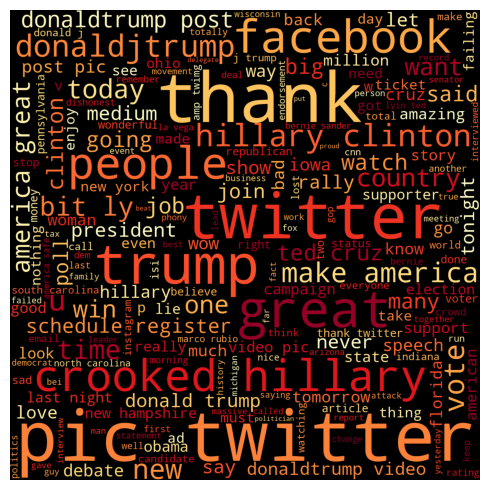

In [470]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1200, 
                      height = 1200,
                      colormap='YlOrRd',
                      background_color='black',
                      min_font_size=6).generate(final)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [471]:
from PIL import Image
import numpy as np
mask = np.array(Image.open('maski.jpg'))
mask.shape

(414, 820, 3)

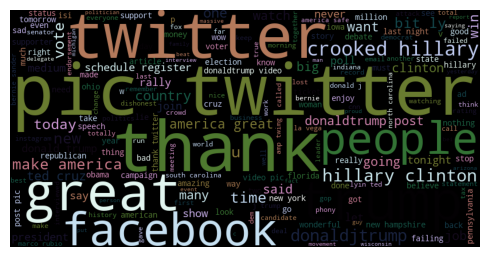

In [472]:
wordcloud = WordCloud(width = 1200, 
                      height = 1200,
                      colormap='cubehelix_r',
                      mask = mask,
                      background_color='black',
                      min_font_size=6).generate(final)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [473]:
mask_dony = np.array(Image.open('minion.jpg'))
mask_dony.shape

(400, 400, 3)

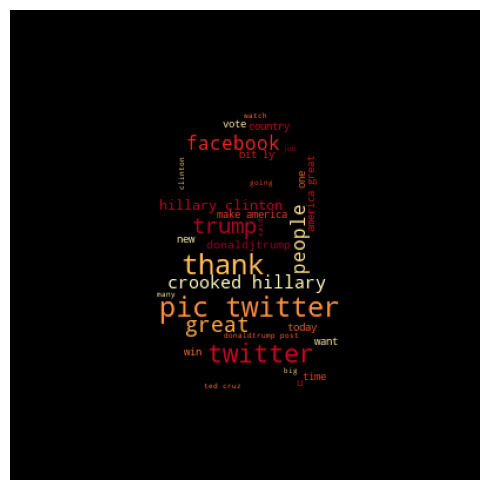

In [474]:
wordcloud = WordCloud(width = 1200, 
                      height = 1200,
                      colormap='YlOrRd',
                      mask = mask_dony,
                      background_color='black',
                      min_font_size=6).generate(final)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()